In [131]:
#Content-based recommender system for Hotels

In [132]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import seaborn as sns

In [133]:
# reads the scrapped hotel data contain in the .csv  file into a Dataframe Object 
data = pd.read_csv("dataset.csv")
data.shape


(80, 23)

In [134]:
# Choosing the features of hotels to be used for the recommendation
df = data[['hotel_name','air_conditioning','breakfast','value','hotel_style','cleanliness','free_parking','free_wifi','hotel_class','house_keeping','location','overall_rating','service']]
number_of_rows = (len(df.index))
df.head()


,hotel_name,air_conditioning,breakfast,value,hotel_style,cleanliness,free_parking,free_wifi,hotel_class,house_keeping,location,overall_rating,service
0,Haley's Hotel and Restaurant,No,YES,4.0,"Residential Neighbourhood,Business",4.0,YES,YES,3.0,YES,4.5,4.0,4.0
1,Mansio Suites Basinghall,No,No,4.5,Nil1,5.0,No,YES,4.0,No,5.0,4.5,4.5
2,The Kingston Hotel,No,No,3.0,Centrally Located,3.0,YES,YES,3.0,No,4.0,3.0,3.0
3,Quay Apartments Leeds,No,No,3.5,"Centrally Located, Modern",4.0,No,YES,4.0,YES,4.0,4.0,4.0
4,Premier Inn Leeds City Centre (Wellington Stre...,YES,No,4.5,"Quiet,Family",4.5,No,No,3.0,YES,4.0,4.0,4.5


In [135]:
#cleaning the hotel_style column
df['hotel_style'] = df['hotel_style'].str.replace(' ', '')
df['hotel_style'] = df['hotel_style'].map(lambda x: x.split(','))
df.head()

,hotel_name,air_conditioning,breakfast,value,hotel_style,cleanliness,free_parking,free_wifi,hotel_class,house_keeping,location,overall_rating,service
0,Haley's Hotel and Restaurant,No,YES,4.0,"[ResidentialNeighbourhood, Business]",4.0,YES,YES,3.0,YES,4.5,4.0,4.0
1,Mansio Suites Basinghall,No,No,4.5,[Nil1],5.0,No,YES,4.0,No,5.0,4.5,4.5
2,The Kingston Hotel,No,No,3.0,[CentrallyLocated],3.0,YES,YES,3.0,No,4.0,3.0,3.0
3,Quay Apartments Leeds,No,No,3.5,"[CentrallyLocated, Modern]",4.0,No,YES,4.0,YES,4.0,4.0,4.0
4,Premier Inn Leeds City Centre (Wellington Stre...,YES,No,4.5,"[Quiet, Family]",4.5,No,No,3.0,YES,4.0,4.0,4.5


In [136]:
# set the index of the dataframe to the name of the hotel
df.set_index('hotel_name', inplace = True)
df.head()

,air_conditioning,breakfast,value,hotel_style,cleanliness,free_parking,free_wifi,hotel_class,house_keeping,location,overall_rating,service
hotel_name,,,,,,,,,,,,
Haley's Hotel and Restaurant,No,YES,4.0,"[ResidentialNeighbourhood, Business]",4.0,YES,YES,3.0,YES,4.5,4.0,4.0
Mansio Suites Basinghall,No,No,4.5,[Nil1],5.0,No,YES,4.0,No,5.0,4.5,4.5
The Kingston Hotel,No,No,3.0,[CentrallyLocated],3.0,YES,YES,3.0,No,4.0,3.0,3.0
Quay Apartments Leeds,No,No,3.5,"[CentrallyLocated, Modern]",4.0,No,YES,4.0,YES,4.0,4.0,4.0
Premier Inn Leeds City Centre (Wellington Street) Hotel,YES,No,4.5,"[Quiet, Family]",4.5,No,No,3.0,YES,4.0,4.0,4.5


In [137]:
#converting the columns with numerals to String
df['value'] = df['value'].astype(str) 
df['cleanliness'] = df['cleanliness'].astype(str) 
df['hotel_class'] = df['hotel_class'].astype(str) 
df['location'] = df['location'].astype(str) 
df['overall_rating'] = df['overall_rating'].astype(str) 
df['service'] = df['service'].astype(str) 

#merging all the columns into one column
df['hotel_features'] = ''
columns = df.columns
for index, row in df.iterrows():
    words = ''
    for col in columns:
        if col == 'hotel_style':
            words = words + ' '.join(row[col])+ ' '
        else:
            words = words + row[col]+ ' '
    row['hotel_features'] = words
    
df.drop(columns = [col for col in df.columns if col!= 'hotel_features'], inplace = True)

In [138]:
df.head()

,hotel_features
hotel_name,
Haley's Hotel and Restaurant,No YES 4.0 ResidentialNeighbourhood Business 4...
Mansio Suites Basinghall,No No 4.5 Nil1 5.0 No YES 4.0 No 5.0 4.5 4.5
The Kingston Hotel,No No 3.0 CentrallyLocated 3.0 YES YES 3.0 No ...
Quay Apartments Leeds,No No 3.5 CentrallyLocated Modern 4.0 No YES 4...
Premier Inn Leeds City Centre (Wellington Street) Hotel,YES No 4.5 Quiet Family 4.5 No No 3.0 YES 4.0 ...


In [139]:
# instantiating and generating the count matrix
count = CountVectorizer()
count_matrix = count.fit_transform(df['hotel_features'])

# creating a Series(basically an array) for the name of the hotels so they are associated to an ordered numerical which will be used  to match the indexes
indices = pd.Series(df.index)
indices[:5]

0                         Haley's Hotel and Restaurant
1                             Mansio Suites Basinghall
2                                   The Kingston Hotel
3                                Quay Apartments Leeds
4    Premier Inn Leeds City Centre (Wellington Stre...
Name: hotel_name, dtype: object

In [140]:
# generating the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.43259046, 0.67445327, ..., 0.67445327, 0.85839508,
        0.43259046],
       [0.43259046, 1.        , 0.8819171 , ..., 0.8819171 , 0.69293487,
        0.94444444],
       [0.67445327, 0.8819171 , 1.        , ..., 1.        , 0.85714286,
        0.8819171 ],
       ...,
       [0.67445327, 0.8819171 , 1.        , ..., 1.        , 0.85714286,
        0.8819171 ],
       [0.85839508, 0.69293487, 0.85714286, ..., 0.85714286, 1.        ,
        0.69293487],
       [0.43259046, 0.94444444, 0.8819171 , ..., 0.8819171 , 0.69293487,
        1.        ]])

In [141]:
#function to recommend hotel based on cosine similarity index
def recommendations(title, cosine_sim = cosine_sim):
    
    recommended_hotels = []
    
    # getting the index of the hotel that matches the name of the hotel
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 3 most similar hotels
    top_3_indexes = list(score_series.iloc[1:4].index)
    
    # populating the list with the titles of the best 5 matching hotels
    for i in top_3_indexes:
        recommended_hotels.append(list(df.index)[i])
        
    return recommended_hotels

In [142]:
# testing the recommendation function
recommendations('Clayton Hotel Leeds')

['Corn Mill Lodge Hotel', 'Crowne Plaza Leeds', 'Village Hotel Leeds North']

In [143]:
pairs = []
# create a list of tuples
for i,v in enumerate(indices):
    for j in indices[:i+number_of_rows]:
        pairs.append((indices[i], j))

print("There are a total of " + str(len(pairs)) + " pairs")
print("Displaying first 10 pairs: ")
display(pairs[:10])
print("....")
print("Displaying last 10 pairs: ")
display(pairs[-10:])

There are a total of 6400 pairs
Displaying first 10 pairs: 


[("Haley's Hotel and Restaurant", "Haley's Hotel and Restaurant"),
 ("Haley's Hotel and Restaurant", 'Mansio Suites Basinghall'),
 ("Haley's Hotel and Restaurant", 'The Kingston Hotel'),
 ("Haley's Hotel and Restaurant", 'Quay Apartments Leeds'),
 ("Haley's Hotel and Restaurant",
  'Premier Inn Leeds City Centre (Wellington Street) Hotel'),
 ("Haley's Hotel and Restaurant", 'Mercure Leeds Parkway'),
 ("Haley's Hotel and Restaurant", 'Quebecs Luxury Apartments'),
 ("Haley's Hotel and Restaurant", 'Holiday Inn Express Leeds East'),
 ("Haley's Hotel and Restaurant", 'The Wrens Hotel'),
 ("Haley's Hotel and Restaurant", 'Premier Inn Leeds East hotel')]

....
Displaying last 10 pairs: 


[('Half Moon Inn', 'Malmaison Leeds'),
 ('Half Moon Inn', 'Doubletree by Hilton Hotel Leeds City Centre'),
 ('Half Moon Inn', 'Dakota Leeds'),
 ('Half Moon Inn', 'Opal 1 & 2'),
 ('Half Moon Inn', 'Vista Serviced Apartments'),
 ('Half Moon Inn', 'University of Leeds - Storm Jameson Court'),
 ('Half Moon Inn', 'Wheelgate Guest House'),
 ('Half Moon Inn', 'Hillcroft Barn'),
 ('Half Moon Inn', 'The Midland Hotel'),
 ('Half Moon Inn', 'Half Moon Inn')]

In [144]:
cosine_sim.size

6400

In [145]:
# create a one dimensional array from the cosine similarities  values, i.e stack the cosine_similarities values
cosine_1D = np.hstack(cosine_sim)
# display the size of the new created array
cosine_1D.shape


(6400,)

In [146]:
# create a dataframe to contain the hotel pairs and their similarities
dframe = pd.DataFrame({'pair': pairs, 'similarity': cosine_1D, 'rounded_similarity' : cosine_1D.round(3)})
display(dframe.head())
display(dframe.tail())

,pair,similarity,rounded_similarity
0,"(Haley's Hotel and Restaurant, Haley's Hotel a...",1.000000,1.000
1,"(Haley's Hotel and Restaurant, Mansio Suites B...",0.432590,0.433
2,"(Haley's Hotel and Restaurant, The Kingston Ho...",0.674453,0.674
3,"(Haley's Hotel and Restaurant, Quay Apartments...",0.651584,0.652
4,"(Haley's Hotel and Restaurant, Premier Inn Lee...",0.651584,0.652


,pair,similarity,rounded_similarity
6395,"(Half Moon Inn, University of Leeds - Storm Ja...",0.944444,0.944
6396,"(Half Moon Inn, Wheelgate Guest House)",0.944444,0.944
6397,"(Half Moon Inn, Hillcroft Barn)",0.881917,0.882
6398,"(Half Moon Inn, The Midland Hotel)",0.692935,0.693
6399,"(Half Moon Inn, Half Moon Inn)",1.000000,1.000


In [147]:
# make a copy
df_temp = dframe.copy()

# convert list of tuples into 2 lists
list1 = []
list2 = []
for item1, item2 in df_temp.pair:
    list1.append(item1)
    list2.append(item2)
# add two columns to df_temp
df_temp['first_pair'] = list1
df_temp['second_pair'] = list2

# drop the pair list
df_temp.drop('pair', axis=1, inplace=True)

# create the pairs list
df_temp['pairs'] = list(zip(df_temp.first_pair, df_temp.second_pair,))

# display the first five 
display(df_temp.head())
display(df_temp.tail())
df_temp.to_csv(path_or_buf= "Tableau_data.csv",index=False)


,similarity,rounded_similarity,first_pair,second_pair,pairs
0,1.000000,1.000,Haley's Hotel and Restaurant,Haley's Hotel and Restaurant,"(Haley's Hotel and Restaurant, Haley's Hotel a..."
1,0.432590,0.433,Haley's Hotel and Restaurant,Mansio Suites Basinghall,"(Haley's Hotel and Restaurant, Mansio Suites B..."
2,0.674453,0.674,Haley's Hotel and Restaurant,The Kingston Hotel,"(Haley's Hotel and Restaurant, The Kingston Ho..."
3,0.651584,0.652,Haley's Hotel and Restaurant,Quay Apartments Leeds,"(Haley's Hotel and Restaurant, Quay Apartments..."
4,0.651584,0.652,Haley's Hotel and Restaurant,Premier Inn Leeds City Centre (Wellington Stre...,"(Haley's Hotel and Restaurant, Premier Inn Lee..."


,similarity,rounded_similarity,first_pair,second_pair,pairs
6395,0.944444,0.944,Half Moon Inn,University of Leeds - Storm Jameson Court,"(Half Moon Inn, University of Leeds - Storm Ja..."
6396,0.944444,0.944,Half Moon Inn,Wheelgate Guest House,"(Half Moon Inn, Wheelgate Guest House)"
6397,0.881917,0.882,Half Moon Inn,Hillcroft Barn,"(Half Moon Inn, Hillcroft Barn)"
6398,0.692935,0.693,Half Moon Inn,The Midland Hotel,"(Half Moon Inn, The Midland Hotel)"
6399,1.000000,1.000,Half Moon Inn,Half Moon Inn,"(Half Moon Inn, Half Moon Inn)"


In [148]:
# convert to a matrix
matrix_form = df_temp.pivot_table(index='first_pair', columns='second_pair', values='similarity')
display(matrix_form)

second_pair,42 The Calls Hotel,Art Hostel,Ascot Grange Hotel,Best Western Plus Milford Hotel,Boundary Hotel,Briggate Boutique,Britannia Leeds Hotel,Clayton Hotel Leeds,Corn Mill Lodge Hotel,Cosmopolitan Hotel,...,Travelodge Leeds Colton,University of Leeds - Storm Jameson Court,Village Hotel Leeds North,Village Hotel Leeds South,Vista Serviced Apartments,Weetwood Hall Estate,Wheelgate Guest House,Willow Cottage,easyHotel Leeds City Centre,ibis Leeds Centre Marlborough Street Hotel
first_pair,,,,,,,,,,,,,,,,,,,,,
42 The Calls Hotel,1.000000,0.858395,0.674453,0.651584,0.858395,0.919255,0.858395,0.802955,0.802955,0.829288,...,0.894737,0.919255,0.858395,0.651584,0.919255,0.630893,0.919255,0.486664,0.919255,0.651584
Art Hostel,0.858395,1.000000,0.857143,0.828079,0.928571,0.881917,0.928571,0.868599,0.868599,0.966092,...,0.858395,0.881917,0.928571,0.828079,0.881917,0.801784,0.881917,0.692935,0.881917,0.828079
Ascot Grange Hotel,0.674453,0.857143,1.000000,0.966092,0.857143,0.692935,0.857143,0.801784,0.801784,0.897085,...,0.674453,0.692935,0.857143,0.897085,0.692935,0.935414,0.692935,0.881917,0.692935,0.966092
Best Western Plus Milford Hotel,0.651584,0.828079,0.966092,1.000000,0.828079,0.669439,0.828079,0.774597,0.774597,0.866667,...,0.651584,0.669439,0.828079,0.866667,0.669439,0.903696,0.669439,0.852013,0.669439,0.933333
Boundary Hotel,0.858395,0.928571,0.857143,0.828079,1.000000,0.881917,0.928571,0.868599,0.868599,0.897085,...,0.919709,0.881917,0.928571,0.828079,0.881917,0.801784,0.881917,0.692935,0.881917,0.828079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Weetwood Hall Estate,0.630893,0.801784,0.935414,0.903696,0.801784,0.648181,0.801784,0.875000,0.875000,0.839146,...,0.630893,0.648181,0.801784,0.839146,0.648181,1.000000,0.648181,0.824958,0.648181,0.903696
Wheelgate Guest House,0.919255,0.881917,0.692935,0.669439,0.881917,0.944444,0.881917,0.824958,0.824958,0.852013,...,0.919255,0.944444,0.881917,0.669439,0.944444,0.648181,1.000000,0.444444,0.944444,0.669439
Willow Cottage,0.486664,0.692935,0.881917,0.852013,0.692935,0.444444,0.692935,0.648181,0.648181,0.669439,...,0.432590,0.444444,0.692935,0.852013,0.444444,0.824958,0.444444,1.000000,0.444444,0.852013


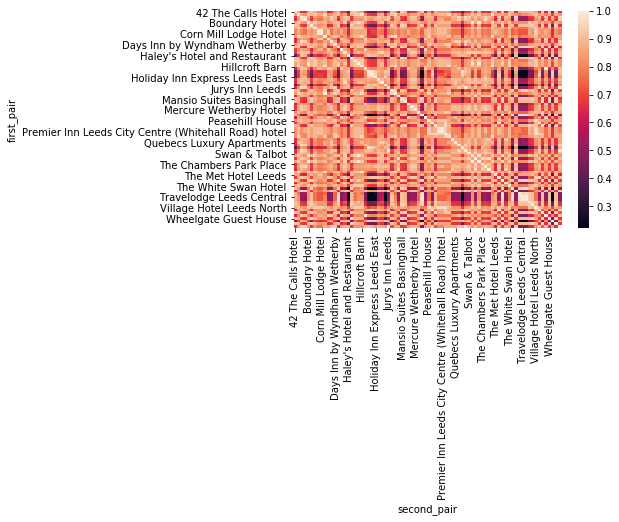

In [149]:
 # create a heat map from the matrix
 sns.heatmap(matrix_form)